In [50]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib.pyplot
!pip install warnings
!pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings
  Using cached scikit_learn-1.8.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp313-cp313-macosx_12_0_arm64.whl (8.0 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 1.5 MB/s  0:00:18m0:00:0100:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('insurance.csv')

EDA

In [5]:
df.shape


(1338, 7)

In [6]:
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [8]:
df.describe()


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='str')

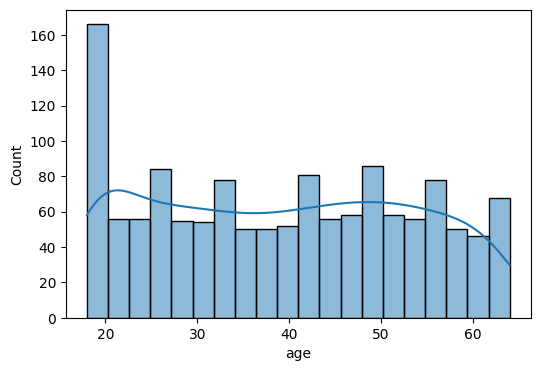

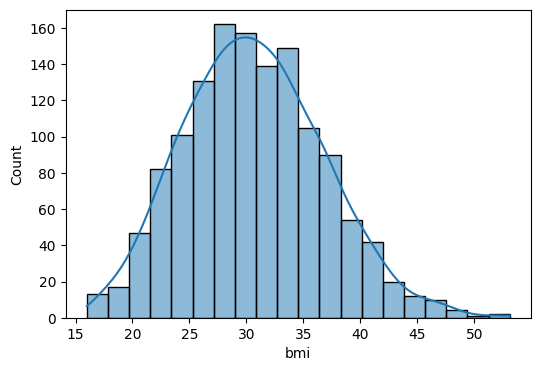

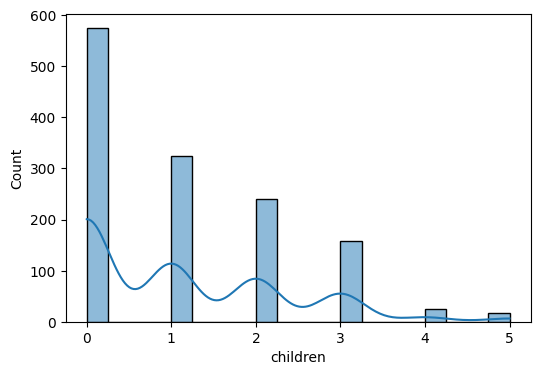

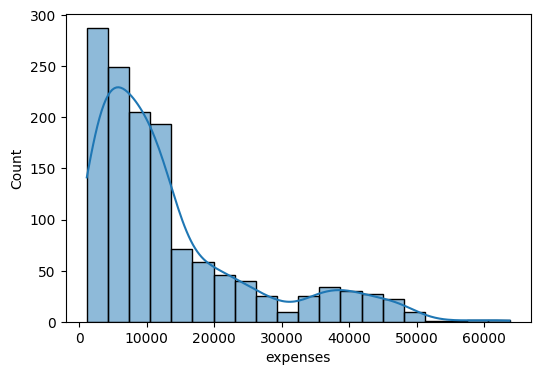

In [12]:

numeric_columns = ['age', 'bmi', 'children','expenses']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde = True,bins = 20)

<Axes: xlabel='children', ylabel='count'>

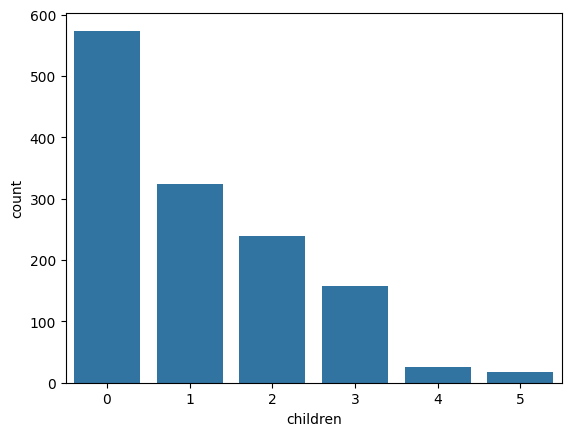

In [13]:
sns.countplot(x = df['children'])


<Axes: xlabel='sex', ylabel='count'>

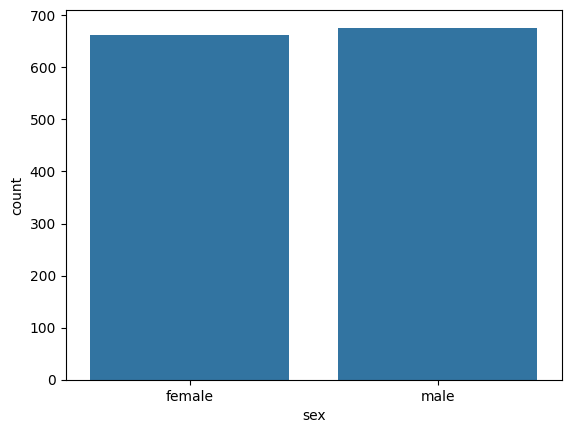

In [14]:
sns.countplot(x = df['sex'])


<Axes: xlabel='smoker', ylabel='count'>

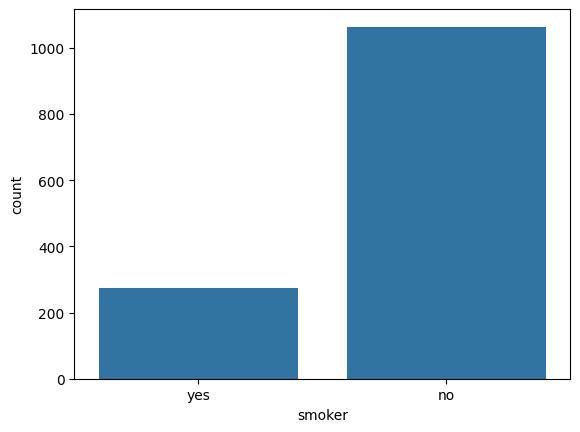

In [15]:
sns.countplot(x = df['smoker'])


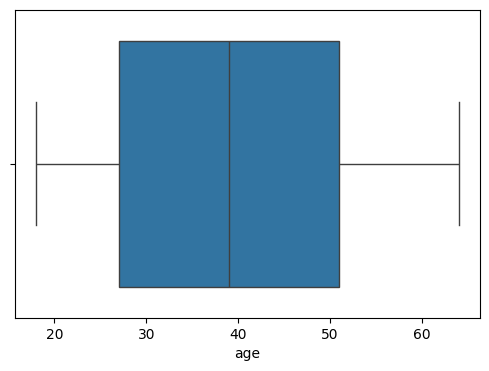

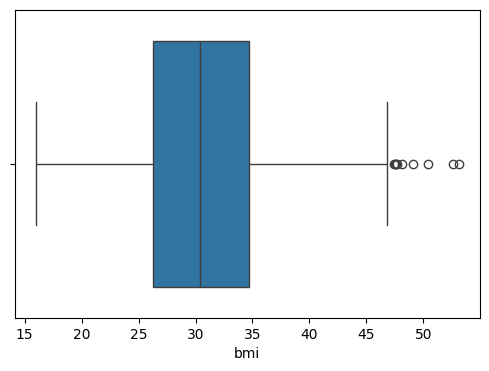

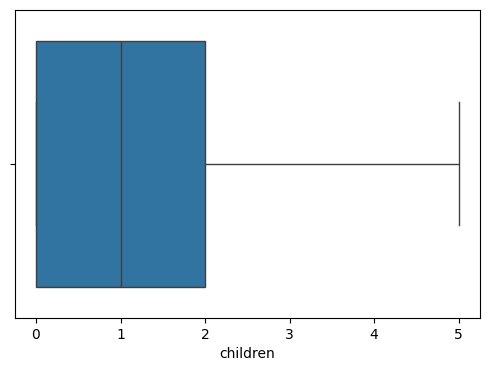

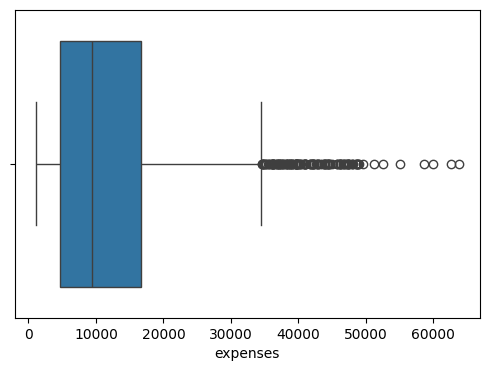

In [16]:

for col in numeric_columns:
    plt.figure(figsize= (6,4))
    sns.boxplot(x = df[col])

<Axes: >

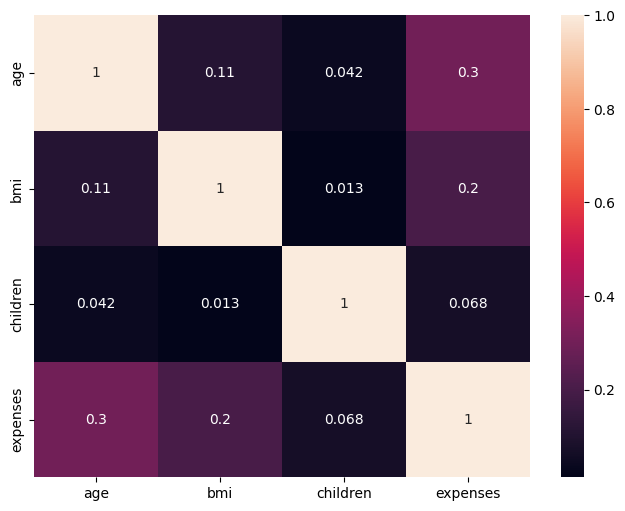

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)


Data Cleaning and preprocessing

In [18]:
df_cleaned = df.copy()

In [19]:
df_cleaned.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [20]:
df_cleaned.shape


(1338, 7)

In [21]:
df_cleaned.drop_duplicates(inplace = True)


In [22]:
df_cleaned.shape


(1337, 7)

In [23]:
df_cleaned.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [24]:
df_cleaned.dtypes


age           int64
sex             str
bmi         float64
children      int64
smoker          str
region          str
expenses    float64
dtype: object

In [25]:
df_cleaned['sex'].value_counts()


sex
male      675
female    662
Name: count, dtype: int64

In [26]:
df_cleaned['sex'] = df_cleaned['sex'].map({"male" : 0,"female" : 1})


In [27]:
df_cleaned.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,yes,southwest,16884.92
1,18,0,33.8,1,no,southeast,1725.55
2,28,0,33.0,3,no,southeast,4449.46
3,33,0,22.7,0,no,northwest,21984.47
4,32,0,28.9,0,no,northwest,3866.86


In [28]:
df_cleaned['smoker'].value_counts()


smoker
no     1063
yes     274
Name: count, dtype: int64

In [29]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({"no" : 0,"yes" : 1})


In [30]:
df_cleaned


,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,northwest,10600.55
1334,18,1,31.9,0,0,northeast,2205.98
1335,18,1,36.9,0,0,southeast,1629.83
1336,21,1,25.8,0,0,southwest,2007.95


In [31]:
df_cleaned.rename(columns={
    'sex' :'is_female',
    'smoker': 'is_smoker'
                          },inplace = True)

In [32]:
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86


In [33]:
df['region'].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [34]:
df_cleaned = pd.get_dummies(df_cleaned,columns = ['region'],drop_first=True)


In [35]:
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,1,27.9,0,1,16884.92,False,False,True
1,18,0,33.8,1,0,1725.55,False,True,False
2,28,0,33.0,3,0,4449.46,False,True,False
3,33,0,22.7,0,0,21984.47,True,False,False
4,32,0,28.9,0,0,3866.86,True,False,False


In [36]:
df_cleaned = df_cleaned.astype(int)


In [37]:
df_cleaned


,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,31,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

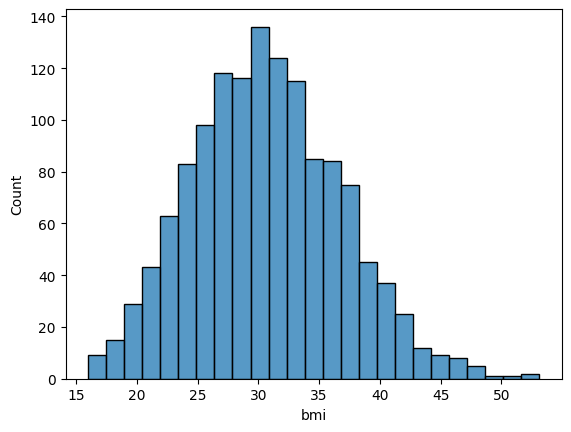

In [38]:
sns.histplot(df['bmi'])


In [39]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [40]:
df_cleaned


,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,31,3,0,10600,1,0,0,Obese
1334,18,1,31,0,0,2205,0,0,0,Obese
1335,18,1,36,0,0,1629,0,1,0,Obese
1336,21,1,25,0,0,2007,0,0,1,Overweight


In [41]:
df_cleaned = pd.get_dummies(df_cleaned,columns = ['bmi_category'],drop_first=True)


In [42]:
df_cleaned = df_cleaned.astype(int)


In [43]:
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [44]:
df_cleaned.columns


Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'expenses',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='str')

In [51]:
from sklearn.preprocessing import StandardScaler
cols = ['age','bmi','children']
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])


In [52]:
df_cleaned.head()


,age,is_female,bmi,children,is_smoker,expenses,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.524321,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.457496,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.457496,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.342502,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.360685,-0.909234,0,3866,1,0,0,0,1,0


In [54]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['expenses'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)


,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.200347
1,bmi,0.197714
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal,-0.104283


In [55]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]


In [58]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['expenses_bin'] = pd.qcut(df_cleaned['expenses'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['expenses_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df


,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.873307,0.181313,Accept Null (Drop Feature)
bmi_category_Normal,4.231793,0.237498,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [59]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'expenses','region_southeast','bmi_category_Obese']]


In [60]:
final_df


,age,is_female,bmi,children,is_smoker,expenses,region_southeast,bmi_category_Obese
0,-1.440418,1,-0.524321,-0.909234,1,16884,0,0
1,-1.511647,0,0.457496,-0.079442,0,1725,1,1
2,-0.799350,0,0.457496,1.580143,0,4449,1,1
3,-0.443201,0,-1.342502,-0.909234,0,21984,0,0
4,-0.514431,0,-0.360685,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,0.130224,1.580143,0,10600,0,1
1334,-1.511647,1,0.130224,-0.909234,0,2205,0,1
1335,-1.511647,1,0.948405,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.851594,-0.909234,0,2007,0,0


In [61]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
